Решить задачи указанным в задании численным методом на любом языке программирования. 
В результате работы программы выдать количество сделанных итераций, найденное решение 
и последовательность {x_k} на каждой итерации. Сделать визуализацию решения задачи.

Задача 2. Из начального приближения x0 = (1, 1) решить задачу безусловной минимизации функции
f: R^2 -> R, f(x) = x1^2 + e^(x2^2)
методом Ньютона.

In [1]:
from sympy import lambdify, symbols, derive_by_array, E
import numpy as np


x1, x2 = symbols("x(1:3)")
expr = x1**2 + E**(x2**2)
f = lambdify((x1, x2), expr, "numpy")
df = lambdify((x1, x2), derive_by_array(expr, [x1, x2]), "numpy")
d2f = lambdify((x1, x2), derive_by_array(derive_by_array(expr, [x1, x2]), [x1, x2]), "numpy")

x = np.array([[1, 1]])

for k in range(1000):
    x_next = [x[k] - np.linalg.inv(d2f(*x[k])).dot(df(*x[k]))]
    x = np.append(x, x_next, axis=0)

    print(f"{k=}, x[{k}]={x[k]}")
    
    if np.linalg.norm(x[k+1] - x[k]) <= 10**(-9):
        print("\nСработал критерий остановки: ||x[k+1] - x[k]|| <= 10^-9")
        break
    if abs(f(*x[k+1])-f(*x[k])) <= 10**(-9):
        print("\nСработал критерий остановки: |f(x[k+1]) - f(x[k])| <= 10^-9")
        break
    if np.linalg.norm(df(*x[k+1])) <= 10**(-9):
        print("\nСработал критерий остановки: ||f'(x[k+1])|| <= 10^-9")
        break
    
print("Всего шагов:", k) # Или k+1? Как считать нулевой шаг?
print("Найденное решение: x =", x[k+1])

k=0, x[0]=[1. 1.]
k=1, x[1]=[0.         0.66666667]
k=2, x[2]=[0.         0.31372549]
k=3, x[3]=[0.         0.05159892]
k=4, x[4]=[0.        0.0002733]

Сработал критерий остановки: ||f'(x[k+1])|| <= 10^-9
Всего шагов: 4
Найденное решение: x = [0.0000000e+00 4.0828782e-11]


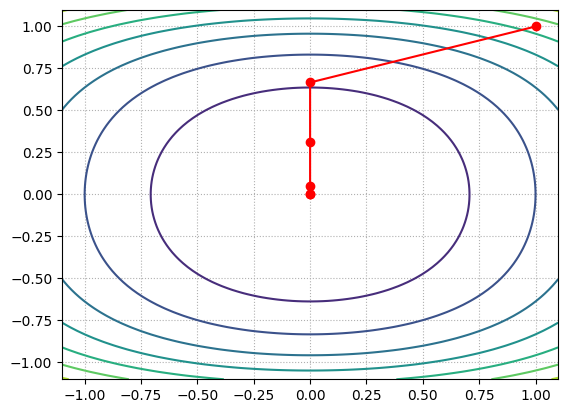

In [2]:
import matplotlib.pyplot as plt


a = b = np.linspace(-1.1, 1.1, 100)
x1_plot, x2_plot = np.meshgrid(a, b)

plt.contour(x1_plot, x2_plot, f(x1_plot, x2_plot))
plt.plot(x.T[0], x.T[1], marker='o',color="red")
plt.grid(linestyle=":")